# 데이터 불러오기

In [ ]:
# Drive mount

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/ETRI_ERC')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/erc_temp


In [ ]:
import pandas as pd
import os
import re
from tqdm import tqdm

pd.set_option('display.max_columns', None)

In [ ]:
def preprocess_df(df):
    df = df[['Numb', 'WAV', ' ', 'Segment ID', 'Total Evaluation', ' .1', ' .2']]
    df = df.rename(columns={'WAV':'WAV_start', ' ':'WAV_end', ' .1':'Valence', ' .2':'Arousal'})
    df.drop([0], inplace=True)
    df.reset_index(inplace=True, drop=True)
    return df

In [ ]:
data_path = './dataset/KEMDy20_v1_1'

ann = pd.read_pickle(os.path.join(data_path, 'new/text_data.pkl'))
ann.head(10)

,segment_id,text,len_text
0,Sess01_script01_User002M_001,"나는 어 어머니, 엄마가 이제 생일 때마다 이제 미역국도 많이 해서 미역국을 되게 ...",52
1,Sess01_script01_User002M_002,전에도 말했지만 그래서 미역국이랑 볶음김치 막 해주셔서 맨날 그렇게 차려주시는데 어...,86
2,Sess01_script01_User002M_003,어 응 거기를 되게 엄 집 앞에 그 조그만한 가게로 있었는데 거기를 엄청 생일 때마...,61
3,Sess01_script01_User002M_004,거기서 엄마랑 둘이 생일 파티 그냥 간단하게 하는 경우도 있었고 보 음 보통 그렇게...,98
4,Sess01_script01_User001F_001,아 친구들도?,7
5,Sess01_script01_User002M_005,응응 그래서 생일 때 그렇게 했던 경험이 있는데 그때가 이제 초등학교 때였는데 이제...,75
6,Sess01_script01_User002M_006,그래서 이제 막 지역 돌아다니면서 캔모아 빙수 있는 가게 저번에 광주 갔을 때도 있...,53
7,Sess01_script01_User002M_007,어 그래서 그런 가게들을 갈 때면 맨날 엄마 생각이 되게 자주 났어.,38
8,Sess01_script01_User002M_008,그래서 일부러 보이면 일부러 가기도 해.,22
9,Sess01_script01_User002M_009,거기 그때 먹었던 빙수 맛이 그대로인데 되게 맛있었거든.,31


# 데이터 전처리

In [ ]:
dataset = ann

dataset.columns

Index(['segment_id', 'text', 'len_text'], dtype='object')

<Axes: >

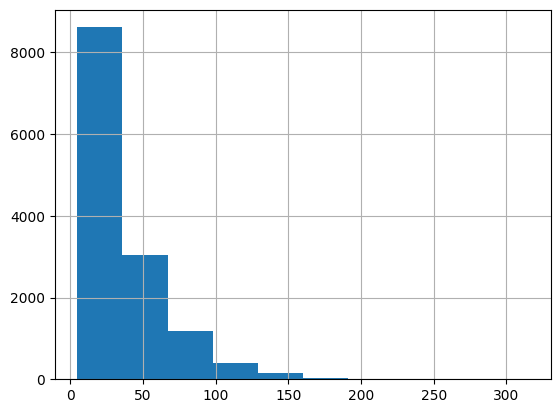

In [ ]:
ann['len_text'].hist()

In [ ]:
ann.head()

,segment_id,text,len_text
0,Sess01_script01_User002M_001,"나는 어 어머니, 엄마가 이제 생일 때마다 이제 미역국도 많이 해서 미역국을 되게 ...",52
1,Sess01_script01_User002M_002,전에도 말했지만 그래서 미역국이랑 볶음김치 막 해주셔서 맨날 그렇게 차려주시는데 어...,86
2,Sess01_script01_User002M_003,어 응 거기를 되게 엄 집 앞에 그 조그만한 가게로 있었는데 거기를 엄청 생일 때마...,61
3,Sess01_script01_User002M_004,거기서 엄마랑 둘이 생일 파티 그냥 간단하게 하는 경우도 있었고 보 음 보통 그렇게...,98
4,Sess01_script01_User001F_001,아 친구들도?,7


In [ ]:
os.chdir('/content/drive/MyDrive/erc_temp')
print(os.getcwd())

/content/drive/MyDrive/erc_temp


In [ ]:
ann.to_csv('text_temp.csv', index =False)

In [ ]:
data_path = './'

dataset = pd.read_csv(os.path.join(data_path, 'text_temp.csv'))

In [ ]:
dataset['text'].head()

0    나는 어 어머니, 엄마가 이제 생일 때마다 이제 미역국도 많이 해서 미역국을 되게 ...
1    전에도 말했지만 그래서 미역국이랑 볶음김치 막 해주셔서 맨날 그렇게 차려주시는데 어...
2    어 응 거기를 되게 엄 집 앞에 그 조그만한 가게로 있었는데 거기를 엄청 생일 때마...
3    거기서 엄마랑 둘이 생일 파티 그냥 간단하게 하는 경우도 있었고 보 음 보통 그렇게...
4                                              아 친구들도?
Name: text, dtype: object

# 토큰화

In [ ]:
# konlpy, Mecab 형태소 분석기 설치 스크립트 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-04-08 05:41:47--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-04-08 05:41:48--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb9e57e64fa73bf1b01b0306186.dl.dropboxusercontent.com/cd/0/get/B5xAKRJ0C_TBZguroMTL1YNU6wtl6uFpp-yPL293Hb8NvOtVr9-UlvKyUJ-F-T7EZSZomBI3u3OZzN4td5AeFYRxr46c7IUi4wcYuL7pR7KvrRT6S26PR-YTFnEIlM40a79XAI-qZjPBNXZWpKmO_UFYzYjTF08WObPEQ_sfKUVJH-8yTX3ORBgz0gFuZ0CTFec/file?dl=1# [following]
--2023-04-08 05:41:48--  https://ucb9e57e64fa73bf1b01b0306186.dl.dropboxusercontent.com/cd/0/get/B5xAKRJ0C_TB

In [ ]:
# 정상 동작 확인
from konlpy.tag import Mecab

mecab = Mecab()

In [ ]:
# mecab
temp_me = dataset
temp_me['token'] = 0
for i in range(len(temp_me['text'])):
    t = temp_me['text'][i]
    m = mecab.pos(t)
    print(m)
    words = [word for word, pos in m if pos != "SF" and pos != "SC" and pos != "JKO" and
             pos != "JKQ" and pos != "SN" and pos != "SH" and pos != "SL" and pos != "SC" and
             pos != "SSC" and pos != "SSO" and pos != "SE" and pos != "NP"]
    print(words)
    temp_me['token'][i] = words

print(temp_me.head(7))

[('나', 'NP'), ('는', 'JX'), ('어', 'IC'), ('어머니', 'NNG'), (',', 'SC'), ('엄마', 'NNG'), ('가', 'JKS'), ('이제', 'MAG'), ('생일', 'NNG'), ('때', 'NNG'), ('마다', 'JX'), ('이제', 'MAG'), ('미역국', 'NNG'), ('도', 'JX'), ('많이', 'MAG'), ('해서', 'VV+EC'), ('미역국', 'NNG'), ('을', 'JKO'), ('되게', 'MAG'), ('좋', 'VA'), ('아', 'EC'), ('하', 'VX'), ('거든', 'EF'), ('.', 'SF')]
['는', '어', '어머니', '엄마', '가', '이제', '생일', '때', '마다', '이제', '미역국', '도', '많이', '해서', '미역국', '되게', '좋', '아', '하', '거든']
[('전', 'NNG'), ('에', 'JKB'), ('도', 'JX'), ('말', 'NNG'), ('했', 'XSV+EP'), ('지만', 'EC'), ('그래서', 'MAJ'), ('미역국', 'NNG'), ('이랑', 'JC'), ('볶음', 'NNG'), ('김치', 'NNG'), ('막', 'NNG'), ('해', 'VV+EC'), ('주', 'VX'), ('셔서', 'EP+EC'), ('맨날', 'MAG'), ('그렇게', 'MAG'), ('차려', 'VV+EC'), ('주', 'VX'), ('시', 'EP'), ('는데', 'EC'), ('어', 'IC'), ('옛날', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('이제', 'MAG'), ('집', 'NNG'), ('에서', 'JKB'), ('밥', 'NNG'), ('먹', 'VV'), ('는', 'ETM'), ('거', 'NNB'), ('보다', 'MAG'), ('그', 'MM'), ('캔', 'NNG'), ('모아', 'VV+EC'), ('빙수', 'NNG'), ('

<ipython-input-11-1b7fdb6b1126>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_me['token'][i] = words


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[('음', 'IC'), ('그게', 'NP+JKS'), ('참', 'MAG'), ('비싼', 'VA+ETM'), ('것', 'NNB'), ('도', 'JX'), ('아니', 'VCN'), ('고', 'EC'), ('그거', 'NP'), ('하나', 'NR'), ('씩', 'XSN'), ('사', 'VV+EC'), ('드리', 'VX'), ('면', 'EC'), ('그게', 'NP+JKS'), ('효도', 'NNG'), ('고', 'VCP+EC'), ('.', 'SF')]
['음', '그게', '참', '비싼', '것', '도', '아니', '고', '하나', '씩', '사', '드리', '면', '그게', '효도', '고']
[('그리고', 'MAJ'), ('저번', 'NNG'), ('에', 'JKB'), ('거기', 'NP'), ('갔', 'VV+EP'), ('다', 'EC'), ('왔잖아', 'VX+EP+EC+VX+EF'), ('.', 'SF')]
['그리고', '저번', '에', '갔', '다', '왔잖아']
[('애기', 'NNG'), ('들', 'XSN'), ('은', 'JX'), ('뛰어노', 'VV'), ('니까', 'EC'), ('.', 'SF')]
['애기', '들', '은', '뛰어노', '니까']
[('광주', 'NNP'), ('살', 'VV+ETM'), ('때', 'NNG'), ('였', 'VCP+EP'), ('는데', 'EC'), ('내', 'NP'), ('가', 'JKS'), ('밥', 'NNG'), ('을', 'JKO'), ('먹', 'VV'), ('으러', 'EC'), ('계단', 'NNG'), ('을', 'JKO'), ('막', 'NNG'), ('뛰어가', 'VV'), ('고', 'EC'), ('있', 'VX'), ('었', 'EP'), ('어', 'EF'), ('.', 'SF')]
['광주', '살', '때', '였', '는데', '가', '밥', '먹', '으러

In [ ]:
import pickle
temp_me.to_pickle('token_NonNP.pkl')

In [ ]:
print(temp_me['text'].tail(10))
print(temp_me['token'].tail(10))

13452                                        그래서 로봇이 가정부야.
13453                                      근데 그 로봇이 굉장히 싸.
13454    그래서 집집마다 가정부가 다 있고 그 가정부가 일을 하는데 무조건 복종해야 되고 거...
13455                                            엄청 재밌었는데.
13456                               근데 그런 거 보니까 좀 소름 돋긴 해.
13457                      뭔가 막 그게 그니까 완전 대중화가 된 시대가 된 거야.
13458                                   그 게임 속 그 스토리 상에서는.
13459    근데 그게 너무 저렴하고 하니까 다 갈아 치우고 막 내 아내처럼, 그니까 내가 아내...
13460                             왜냐면 내 아내를 대신할 사람이 있는 거야.
13461                               그리고 내 딸을 보호해 줄 사람인 거고.
Name: text, dtype: object
13452                                 [그래서, 로봇, 이, 가정부, 야]
13453                               [근데, 그, 로봇, 이, 굉장히, 싸]
13454    [그래서, 집집, 마다, 가정부, 가, 다, 있, 고, 그, 가정부, 가, 일, 하...
13455                                      [엄청, 재밌, 었, 는데]
13456                   [근데, 그런, 거, 보, 니까, 좀, 소름, 돋, 긴, 해]
13457    [뭔가, 막, 그게, 그니까, 완전, 대중, 화, 가, 된, 시대, 가, 된, 거, 야]
13458                         

In [ ]:
temp_me.head(10)

,segment_id,text,len_text,token
0,Sess01_script01_User002M_001,"나는 어 어머니, 엄마가 이제 생일 때마다 이제 미역국도 많이 해서 미역국을 되게 ...",52,"[는, 어, 어머니, 엄마, 가, 이제, 생일, 때, 마다, 이제, 미역국, 도, ..."
1,Sess01_script01_User002M_002,전에도 말했지만 그래서 미역국이랑 볶음김치 막 해주셔서 맨날 그렇게 차려주시는데 어...,86,"[전, 에, 도, 말, 했, 지만, 그래서, 미역국, 이랑, 볶음, 김치, 막, 해..."
2,Sess01_script01_User002M_003,어 응 거기를 되게 엄 집 앞에 그 조그만한 가게로 있었는데 거기를 엄청 생일 때마...,61,"[어, 응, 되게, 엄, 집, 앞, 에, 그, 조그만, 한, 가게, 로, 있, 었,..."
3,Sess01_script01_User002M_004,거기서 엄마랑 둘이 생일 파티 그냥 간단하게 하는 경우도 있었고 보 음 보통 그렇게...,98,"[서, 엄마, 랑, 둘, 이, 생일, 파티, 그냥, 간단, 하, 게, 하, 는, 경..."
4,Sess01_script01_User001F_001,아 친구들도?,7,"[아, 친구, 들, 도]"
5,Sess01_script01_User002M_005,응응 그래서 생일 때 그렇게 했던 경험이 있는데 그때가 이제 초등학교 때였는데 이제...,75,"[응, 응, 그래서, 생일, 때, 그렇, 게, 했, 던, 경험, 이, 있, 는데, ..."
6,Sess01_script01_User002M_006,그래서 이제 막 지역 돌아다니면서 캔모아 빙수 있는 가게 저번에 광주 갔을 때도 있...,53,"[그래서, 이제, 막, 지역, 돌아다니, 면서, 캔, 모아, 빙수, 있, 는, 가게..."
7,Sess01_script01_User002M_007,어 그래서 그런 가게들을 갈 때면 맨날 엄마 생각이 되게 자주 났어.,38,"[어, 그래서, 그런, 가게, 들, 갈, 때, 면, 맨날, 엄마, 생각, 이, 되게..."
8,Sess01_script01_User002M_008,그래서 일부러 보이면 일부러 가기도 해.,22,"[그래서, 일부러, 보이, 면, 일부러, 가, 기, 도, 해]"
9,Sess01_script01_User002M_009,거기 그때 먹었던 빙수 맛이 그대로인데 되게 맛있었거든.,31,"[그때, 먹, 었, 던, 빙수, 맛, 이, 그대로, 인데, 되게, 맛있, 었, 거든]"
